In [1]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .master("local[*]") \
    .appName("PySparkShell") \
    .getOrCreate()

In [3]:

spark = SparkSession.builder.appName('lrex').getOrCreate()
from pyspark.ml.regression import LinearRegression
from pyspark import SQLContext, SparkConf, SparkContext
import matplotlib.pyplot as plt
import numpy as np
from numpy import polyfit

In [4]:
import pandas as pd

In [5]:
import plotly.graph_objects as go

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
import seaborn as sns

In [8]:
CoronaBeer = spark.read.csv('STZ.csv',inferSchema=True, header=True)

In [9]:
CoronaBeer=CoronaBeer.orderBy("Date", ascending=False)

In [10]:
CoronaBeer.createOrReplaceTempView("Beer")

In [11]:
CoronaBeer=spark\
.sql(\
     "SELECT Date,Close \
     FROM Beer")

In [12]:
CoronaCDR = spark.read.csv('covid19',inferSchema=True, header=True)

In [13]:
CoronaCDR=CoronaCDR.orderBy("date", ascending=False)

In [14]:
CoronaCDR.createOrReplaceTempView("covid1")

In [15]:
CoronaCDR=spark\
.sql(\
     "SELECT date,total_cases_per_million \
     FROM covid1 \
     WHERE covid1.iso_code='CHN'")

In [16]:
CoronaCDR.createOrReplaceTempView("covid")

In [17]:
CoronaCDR=spark\
.sql(\
     "SELECT beer.Date,Close,total_cases_per_million \
     FROM  Beer, covid \
     WHERE Beer.Date=covid.date")

In [18]:
pandas_df = CoronaCDR.select("*").toPandas()

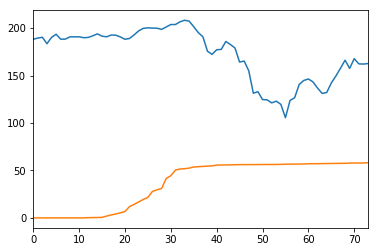

In [19]:
pandas_df['Close'].plot()
pandas_df['total_cases_per_million'].plot()


In [20]:
CoronaCDR.createOrReplaceTempView('CoronaCDR')
CoronaCDR=spark.sql('select row_number() over (order by "Close") as num, * from CoronaCDR')


In [21]:
CoronaCDR.show()
CoronaCDR.createOrReplaceTempView('CoronaCDR')


+---+----------+----------+-----------------------+
|num|      Date|     Close|total_cases_per_million|
+---+----------+----------+-----------------------+
|  1|2020-01-02|188.300003|                  0.019|
|  2|2020-01-03|189.529999|                  0.031|
|  3|2020-01-06|190.399994|                  0.041|
|  4|2020-01-07|183.600006|                  0.041|
|  5|2020-01-08|190.289993|                  0.041|
|  6|2020-01-09|193.589996|                  0.041|
|  7|2020-01-10|188.380005|                  0.041|
|  8|2020-01-13|188.440002|                  0.041|
|  9|2020-01-14|190.830002|                  0.041|
| 10|2020-01-15|190.850006|                  0.041|
| 11|2020-01-16|190.860001|                  0.041|
| 12|2020-01-17|189.949997|                  0.044|
| 13|2020-01-21|190.229996|                  0.268|
| 14|2020-01-22|191.940002|                  0.365|
| 15|2020-01-23|193.970001|                  0.433|
| 16|2020-01-24|191.559998|                  0.613|
| 17|2020-01

In [22]:
CoronaCDR=spark\
.sql(\
     "SELECT num,Close \
     FROM CoronaCDR \
     WHERE num>55")

In [23]:
conf = SparkConf().setMaster('local').setAppName('ML_learning')

In [24]:
sqlcontext = SQLContext(sc)

In [25]:
data = CoronaCDR.select("*")

In [26]:
x1 = data.toPandas()['num'].values.tolist()

In [27]:
y1 = data.toPandas()['Close'].values.tolist()

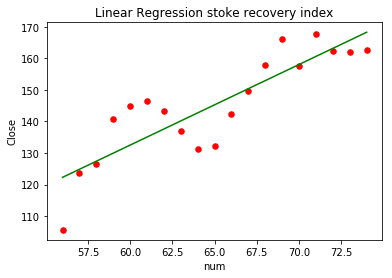

In [28]:
plt.scatter(x1, y1, color='red', s=30)
plt.xlabel('num')
plt.ylabel('Close')
plt.title('Linear Regression stoke recovery index')
p1 = polyfit(x1, y1, 1)
plt.plot(x1, np.polyval(p1,x1), 'g-' )
plt.show()